# Лабораторная работа №2. Визуальный анализ данных
### <a href="https://archive.ics.uci.edu/dataset/863/maternal+health+risk">Беременность с высоким риском</a>

### Описание набора данных:
Данные собраны в различных больницах, клиниках и учреждениях охраны материнства в сельских районах Бангладеш с помощью системы мониторинга рисков, основанной на Интернете вещей (IoT).

### Прилагающаяся информация:
Данный набор данных представлен следующими параметрами:
- Возраст.
- Систолическое артериальное давление.
- Диастолическое АД.
- Уровень сахара в крови.
- Температура тела.
- Частота сердечных сокращений.
- Уровень риска. 

Все вышеперечисленные пункты являются значимыми факторами риска материнской смертности, что является одной из главных задач ЦУР ООН.

### Назначение набора данных и возможные модели:
1) Age - Целое - <b>Возраст пациента</b>
2) SystolicBP - Целое - Верхнее артериальное давление в мм. р.с.
3) DiastolicBP - Целое - Нижнее артериальное давление в мм. р.с.
4) BS - Целое - Уровень глюкозы в крови. Определяется в виде молярной концентрации
5) BodyTemp - Целое - Заданное значение температуры
6) HeartRate - Целое - частота сердцебиения в состоянии покоя
7) RiskLevel - Категоральное - Прогнозируемый уровень интенсивности риска во время беременности

Подключение библиотек и загрузка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = "Maternal_Health_Risk_Data_Set.csv"
data = pd.read_csv(data_path)

data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

## Работа с pandas

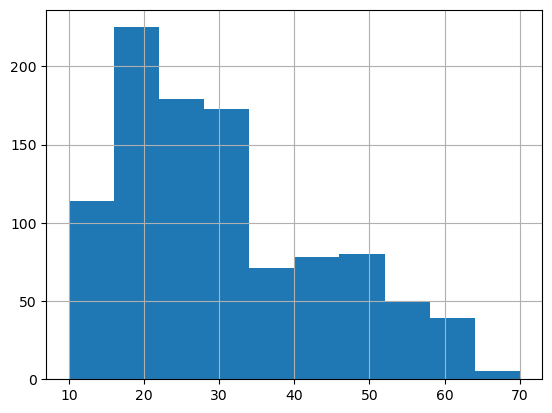

In [5]:
data['Age'].hist();

### Построение диаграммы типа "ящик с усами"
<p>По этой диаграмме можно определить медиану, квартили, интерквартильный размах, выбросы</p>

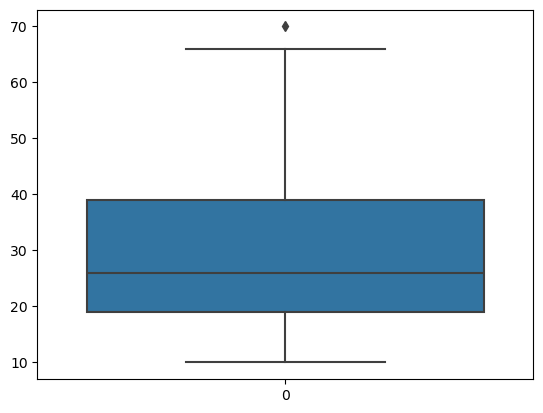

In [12]:
sns.boxplot(data['Age']);

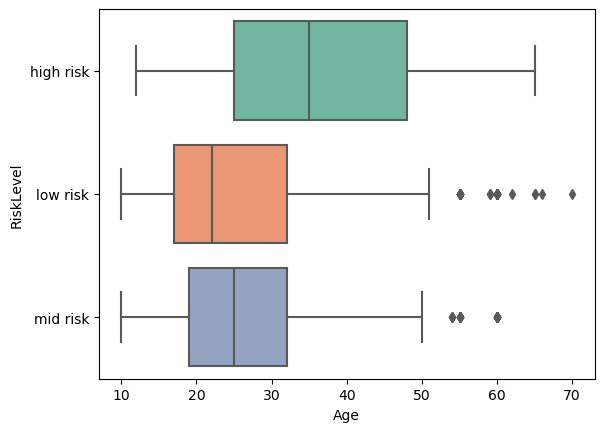

In [10]:
top_data = data[['RiskLevel','Age']]
group_data = top_data.groupby('RiskLevel').sum()
sorted_data = group_data.sort_values('Age',ascending=False)
data_slice = sorted_data[:3].index.values
sns.boxplot(y='RiskLevel', 
            x='Age', 
            data=data[data.RiskLevel.isin(data_slice)], palette='Set2');

Исходя из графика, можно утверждать, что наибольшему риску подвержены женщины в возрасте околок 34 лет. Напротив, женщины в возрасте около 23 лет находятся вне зоны риска

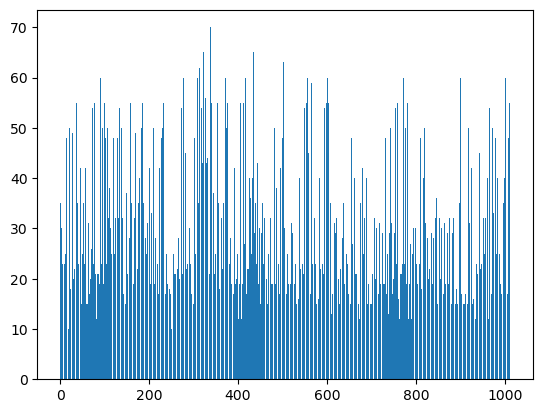

In [13]:
plt.bar(data.index, data['Age'])

plt.show()

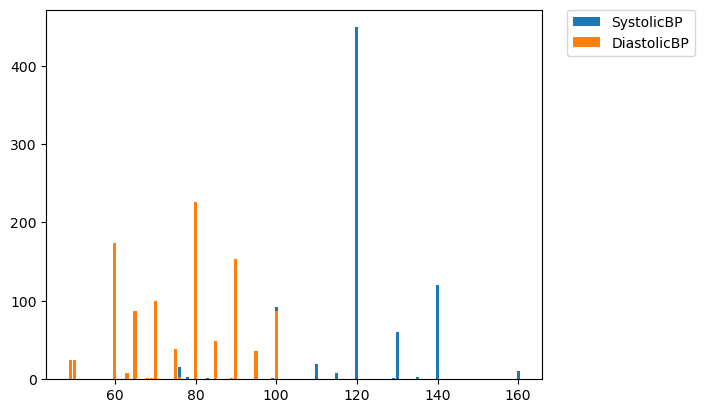

In [33]:
systolic_hist = data['SystolicBP'].value_counts()
diastolic_hist = data['DiastolicBP'].value_counts()

plt.bar(systolic_hist.index, systolic_hist, label='SystolicBP')
plt.bar(diastolic_hist.index, diastolic_hist, label='DiastolicBP')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Выборка признаков

In [34]:
features = [f for f in data.columns if 'BP' in f]
features

['SystolicBP', 'DiastolicBP']

Гистограммы по выбранным признакам

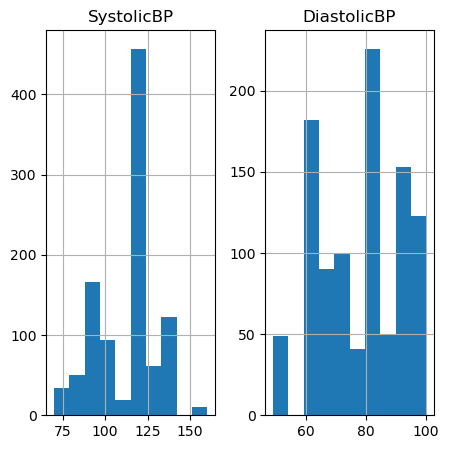

In [35]:
data[features].hist(figsize=(5,5));

Данные графики показывают, что систалическое давление в основном находится на отметке 120 мм. р.с., в то время как диасталическое распределилось более плавно в диапазоне от 60 до 100 мм. р.с.

Гистограммы возраста женщин в период беременности и первые 7 результатов

In [37]:
data['Age'].value_counts()

Age
23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

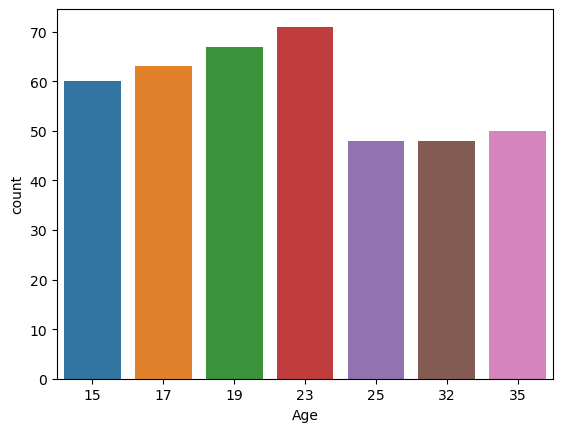

In [42]:
top_ages = data['Age'].value_counts().head(7).index
sns.countplot(data=data[data['Age'].isin(top_ages)], x='Age')

Данная гистограмма показывает, что наиболее частый возраст женщин в выбранном наборе данных - 23 года

<Axes: xlabel='Age', ylabel='count'>

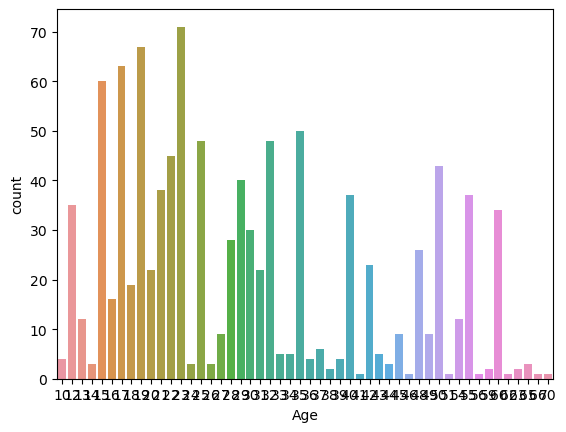

In [43]:
sns.countplot(data=data, x='Age')

Применение Seaborn для попарного распределения признаков

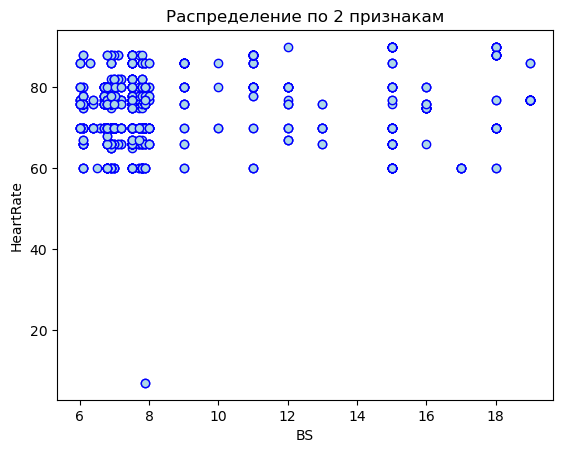

In [57]:
plt.scatter(data['BS'], 
            data['HeartRate'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('BS')
plt.ylabel('HeartRate')
plt.title('Распределение по 2 признакам');

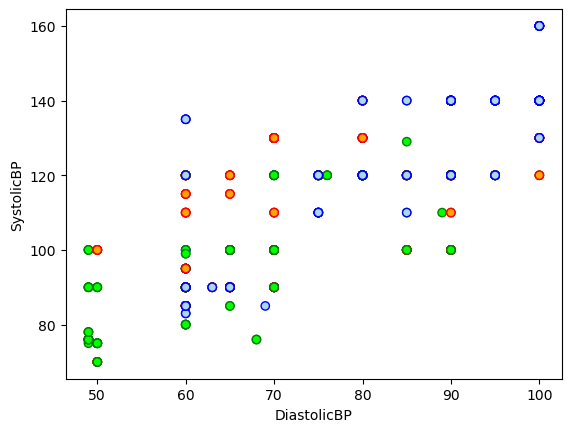

In [54]:
c = data['RiskLevel'].map({'high risk': 'lightblue', 'mid risk': 'orange', 'low risk': 'lime'})
edge_c = data['RiskLevel'].map({'high risk': 'blue', 'mid risk': 'red', 'low risk': 'green'})
# Настройка графика
plt.scatter(data['DiastolicBP'], data['SystolicBP'],
            color=c, edgecolors=edge_c,
           )
plt.xlabel('DiastolicBP')
plt.ylabel('SystolicBP');

### Корреляция признаков с помощью метода "corr"

<b>Корреля́ция</b> — статистическая взаимосвязь двух или нескольких случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми) . При этом изменения одной или нескольких из этих величин приводят к систематическому изменению другой или других величин. Математической мерой корреляции двух случайных величин служит коэффициент корреляции.

In [58]:
numeric_data = data.select_dtypes(include='number')
numeric_data.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


Визуализируем полученную таблицу данных, используя метод heatmap

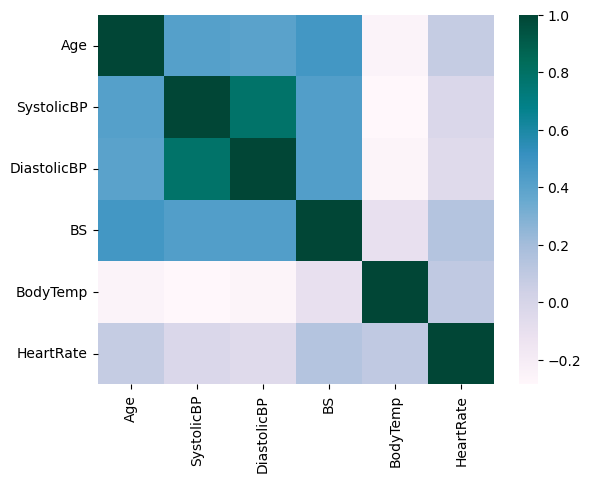

In [59]:
sns.heatmap(numeric_data.corr(), cmap=plt.cm.PuBuGn)

Сильная корреляция наблюдается в парах c систалическим и диасталическим давлением.
Из таких пар удалим один признак:

In [60]:
data_uncorrelated = numeric_data.drop(features, axis=1)
data_uncorrelated.columns

Index(['Age', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

Перестраиваем heatmap без коррелирующих признаков

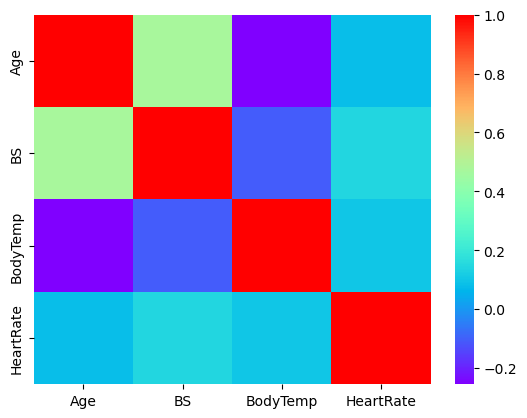

In [61]:
sns.heatmap(data_uncorrelated.corr(), cmap=plt.cm.rainbow);

### Вывод:
В ходе проведенной работы, был проведен анализ набора данных о зависимости фактора риска при беремнности от различных показателей: систалического и диасталического давления, возраста, температуры тела и пр. Соответствующие выводы приведены под каждым из графиков